# Dataset de MNIST (números 7 y 8)

## Imports

In [82]:
import sys

sys.path.append("../libs")

import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import neuronas
from scipy.io import loadmat
from sklearn.metrics import confusion_matrix

importlib.reload(neuronas)

from neuronas import NeuronaPerceptron

## Cargar datos

In [83]:
mnist = loadmat("../data/mnist-original")

## Descripción del dataset

El dataset MNIST (mnist-original) contiene una colección de 70,000 imágenes de dígitos manuscritos del 0 al 9.

Cada imagen es una matriz de 28x28 píxeles, aplanada en un vector de 784 características numéricas, donde cada valor representa la intensidad de gris de un píxel (entre 0 y 255).

Además del conjunto de características, el dataset incluye una columna de etiquetas (label) que indica el dígito correspondiente a cada imagen, representado como un número entre 0 y 9.

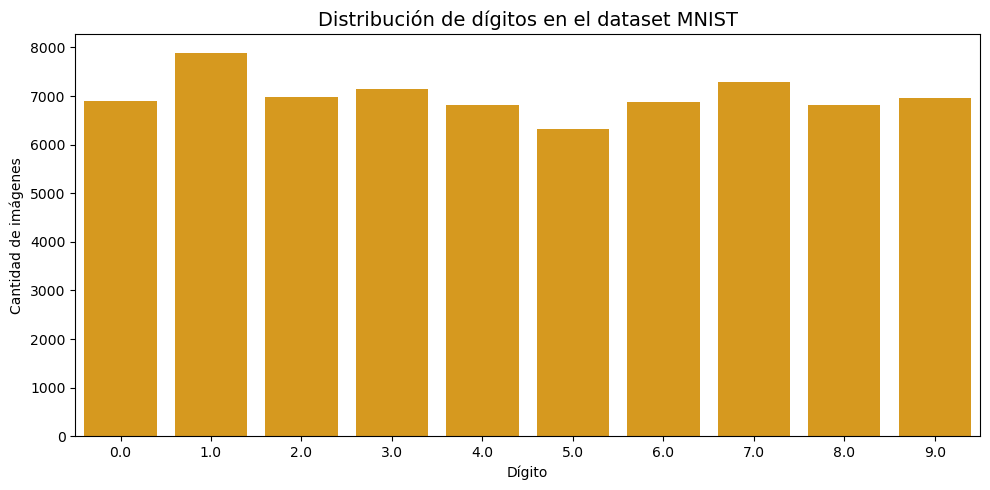

In [84]:
# Crear DataFrame
df = pd.DataFrame({"label": mnist["label"][0]})

# Calcular la frecuencia de cada dígito
label_counts = df["label"].value_counts().sort_index().reset_index()
label_counts.columns = ["Dígito", "Cantidad"]

# Gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(
    x="Dígito", y="Cantidad", data=label_counts,
    palette=["#F4A300"] * 10,
    hue="Dígito", legend=False
)
plt.title("Distribución de dígitos en el dataset MNIST", fontsize=14)
plt.xlabel("Dígito")
plt.ylabel("Cantidad de imágenes")
plt.tight_layout()
plt.show()

## Transformación del dataset

### Extracción y estandarización de datos

In [85]:
# Transponer para pasar filas a columnas y viceversa
x = mnist["data"].T

# Obtener las etiquetas de los elementos
y = mnist["label"][0]

# Normalizar valores entre 0 y 1
x = x / 255
y = y.astype(np.int8)

x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(70000, 784))

### Filtrar números (7 y 8) a utilizar en la predicción

In [86]:
# Seleccionar los indices de los números a predecir
indices_7_8 = [i for i, j in enumerate(y) if j == 7 or j == 8]

# Extraer los números y etiquetas
x_7_8 = x[indices_7_8]
y_7_8 = y[indices_7_8]

len(indices_7_8)

14118

### Visualizar la cantidad de observaciones en el conjunto de datos

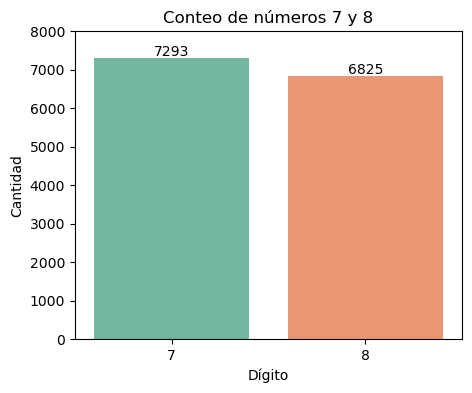

In [87]:
# Convertir a Series y contar ocurrencias
conteo = pd.Series(y_7_8).value_counts().sort_index()

# Gráfico de barras
plt.figure(figsize=(5, 4))
ax = sns.barplot(x=conteo.index, y=conteo.values, palette="Set2", hue=conteo.index, legend=False)

for i, val in enumerate(conteo.values):
    ax.text(i, val + 0.1, str(val), ha='center', va='bottom', fontsize=10)

plt.ylim(top=8000)
plt.title("Conteo de números 7 y 8")
plt.xlabel("Dígito")
plt.ylabel("Cantidad")
plt.show()

### Visualizar las imágenes de los números

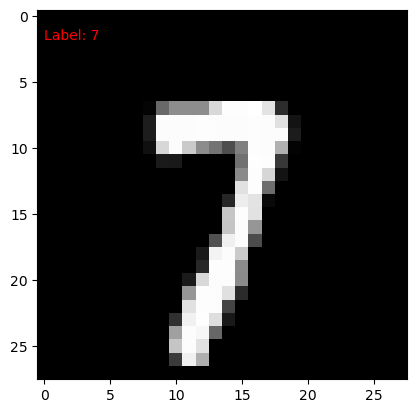

In [88]:
el_indice = 5000
arreglo_imagen = np.array(x_7_8[el_indice])
fig, ax = plt.subplots()
ax.imshow(arreglo_imagen.reshape((28, 28)), cmap="gray")
ax.text(0, 2, "Label: " + str(y_7_8[el_indice]), ha="left", va="bottom", color='red')
plt.show()

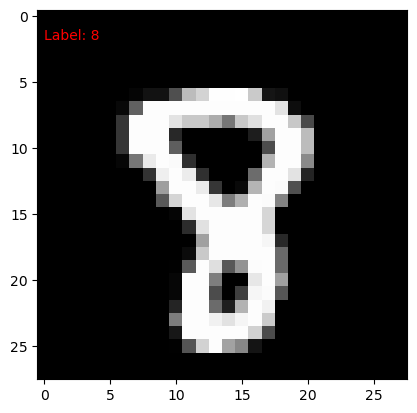

In [89]:
el_indice = 10000
arreglo_imagen = np.array(x_7_8[el_indice])
fig, ax = plt.subplots()
ax.imshow(arreglo_imagen.reshape((28, 28)), cmap="gray")
ax.text(0, 2, "Label: " + str(y_7_8[el_indice]), ha="left", va="bottom", color='red')
plt.show()

### Codificar los datos para predicción

In [90]:
# Reetiquetar: 7 → 0, 8 → 1
y_7_8 = np.where(y_7_8 == 7, 0, 1)

## Dividir entrenamiento y prueba

In [91]:
# Seleccionar aleatoriamente los indices de los números
indices_reordenados = np.random.permutation(len(indices_7_8))

x_7_8 = x_7_8[indices_reordenados]
y_7_8 = y_7_8[indices_reordenados]

# Seleccinar aleatoriamente el conjunto de entrenamiento (80%)
index_for_train = np.random.choice(x_7_8.shape[0], int(x_7_8.shape[0] * 0.8), replace=False)

x_train = x_7_8[index_for_train]
y_train = y_7_8[index_for_train]

# Seleccionaremos el 20% restante para hacer las pruebas,
# mediante operaciones de conjuntos.
group_all_indexes_100p = set(range(x_7_8.shape[0])) 
group_selected_indexes_80p = set(index_for_train)
group_not_selected_indexes_20p = group_all_indexes_100p - group_selected_indexes_80p
group_not_selected_indexes_20p = list(group_not_selected_indexes_20p)

x_test = x_7_8[group_not_selected_indexes_20p]
y_test = y_7_8[group_not_selected_indexes_20p]

## Entrenamiento

In [92]:
labels = ["7", "8"]

### Entrenamiento con 1 época

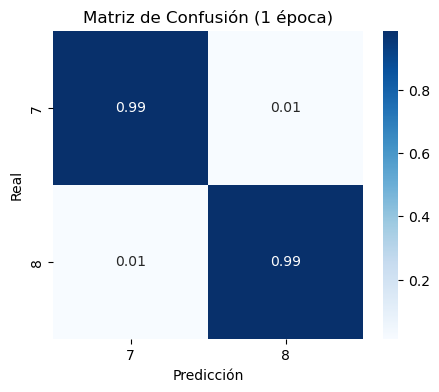

In [93]:
neurona_mnist_1 = NeuronaPerceptron(entradas=784, salidas=1)
neurona_mnist_1.entrenar_ajustar(x_train, y_train, 0.025, 1)
salidas_1 = neurona_mnist_1.predecir_feedforward(x_test)

# Matriz de confusión
cm = confusion_matrix(y_test, salidas_1, normalize="true")

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels,
)
plt.title("Matriz de Confusión (1 época)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

### Entrenamiento con 2 épocas

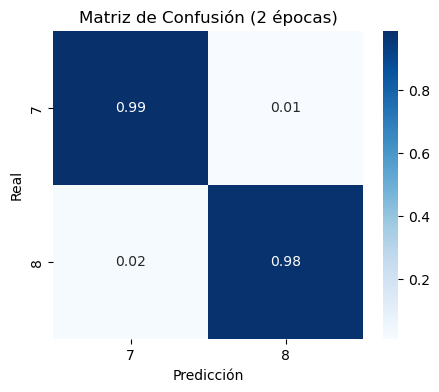

In [94]:
neurona_mnist_2 = NeuronaPerceptron(entradas=784, salidas=1)
neurona_mnist_2.entrenar_ajustar(x_train, y_train, 0.025, 2)
salidas_2 = neurona_mnist_2.predecir_feedforward(x_test)

# Matriz de confusión
cm = confusion_matrix(y_test, salidas_2, normalize="true")

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels,
)
plt.title("Matriz de Confusión (2 épocas)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

### Entrenamiento con 3 épocas

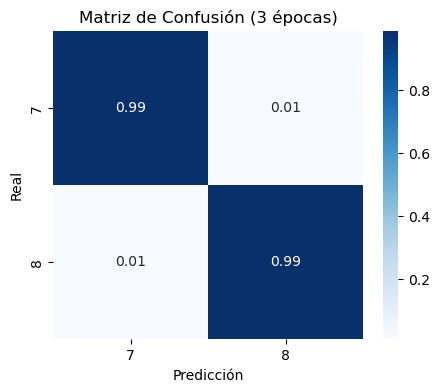

In [95]:
neurona_mnist_3 = NeuronaPerceptron(entradas=784, salidas=1)
neurona_mnist_3.entrenar_ajustar(x_train, y_train, 0.025, 3)
salidas_3 = neurona_mnist_3.predecir_feedforward(x_test)

# Matriz de confusión
cm = confusion_matrix(y_test, salidas_3, normalize="true")

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels,
)
plt.title("Matriz de Confusión (3 épocas)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

### Entrenamiento con 4 épocas

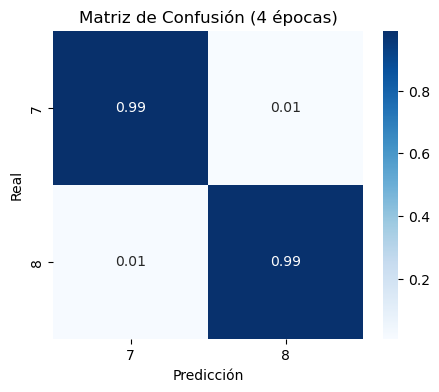

In [96]:
neurona_mnist_4 = NeuronaPerceptron(entradas=784, salidas=1)
neurona_mnist_4.entrenar_ajustar(x_train, y_train, 0.025, 4)
salidas_4 = neurona_mnist_4.predecir_feedforward(x_test)

# Matriz de confusión
cm = confusion_matrix(y_test, salidas_4, normalize="true")

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels,
)
plt.title("Matriz de Confusión (4 épocas)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()